## Results

Salary, seniority and company are the most important factors driving employee churn, which makes sense since many people change jobs to increase their salary, more senior employees are likely to stay in their positions longer, and company culture can have a big impact on employee churn rates. One key follow-up would be to look at the company cultures at the various companies and see whether there are commonalities between companies with higher or lower churn rates. Since salary is the most important driver, it is important that the company make sure that their compensation ladder is industry-appropriate, and that employees have the opportunity for raises and promotions. Seniority is more difficult to address, but hiring experienced people whenever appropriate may help decrease churn. Given that salary is the primary driver of employee churn, I would like to see a variable indicating the percentage that the employee's salary has increased during their time at the company.

## EDA and Decision Tree Regression

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
import datetime

In [3]:
from datetime import datetime

In [4]:
data = pd.read_csv("employee_retention_data.csv")

In [5]:
data.columns.values

array(['employee_id', 'company_id', 'dept', 'seniority', 'salary',
       'join_date', 'quit_date'], dtype=object)

In [6]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015
1,825355.0,7,marketing,20,183000.0,4/29/2013,4/4/2014
2,927315.0,4,marketing,14,101000.0,10/13/2014,NaN
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013
4,256971.0,2,data_science,23,276000.0,10/17/2011,8/22/2014


In [7]:
data.shape

(24702, 7)

In [8]:
data.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

In [43]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [9]:
filtered_data = data[data['quit_date'].notnull()]

In [10]:
filtered_data.shape

(13510, 7)

In [11]:
data_subset = filtered_data[filtered_data['join_date'].notnull()]

In [12]:
data_subset.shape

(13510, 7)

In [13]:
filtered_data['time_employed'] = pd.to_datetime(pd.Series(filtered_data['quit_date'])) - pd.to_datetime(pd.Series(filtered_data['join_date']))

C:\Users\Roz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
filtered_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,time_employed
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015,585 days
1,825355.0,7,marketing,20,183000.0,4/29/2013,4/4/2014,340 days
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013,389 days
4,256971.0,2,data_science,23,276000.0,10/17/2011,8/22/2014,1040 days
5,509529.0,4,data_science,14,165000.0,1/30/2012,8/30/2013,578 days


In [15]:
type(filtered_data['time_employed'])

pandas.core.series.Series

In [16]:
filtered_data.dtypes

employee_id              float64
company_id                 int64
dept                      object
seniority                  int64
salary                   float64
join_date                 object
quit_date                 object
time_employed    timedelta64[ns]
dtype: object

In [17]:
filtered_data['days_employed'] = filtered_data['time_employed'].dt.days

C:\Users\Roz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
filtered_data.dtypes

employee_id              float64
company_id                 int64
dept                      object
seniority                  int64
salary                   float64
join_date                 object
quit_date                 object
time_employed    timedelta64[ns]
days_employed              int64
dtype: object

In [19]:
filtered_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,time_employed,days_employed
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015,585 days,585
1,825355.0,7,marketing,20,183000.0,4/29/2013,4/4/2014,340 days,340
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013,389 days,389
4,256971.0,2,data_science,23,276000.0,10/17/2011,8/22/2014,1040 days,1040
5,509529.0,4,data_science,14,165000.0,1/30/2012,8/30/2013,578 days,578


In [44]:
filtered_data.describe()

,employee_id,company_id,seniority,salary,time_employed,days_employed
count,13510.000000,13510.000000,13510.000000,13510.000000,13510,13510.000000
mean,502039.463138,3.459511,14.131458,135652.405625,613 days 11:41:01.643227,613.486825
std,287981.253645,2.709589,8.008437,71443.847770,328 days 14:56:33.800149,328.622613
min,36.000000,1.000000,1.000000,17000.000000,102 days 00:00:00,102.000000
25%,252829.500000,1.000000,7.000000,81000.000000,361 days 00:00:00,361.000000
50%,501207.500000,2.000000,14.000000,122000.000000,417 days 00:00:00,417.000000
75%,755069.250000,5.000000,21.000000,180000.000000,781 days 00:00:00,781.000000
max,999969.000000,12.000000,99.000000,379000.000000,1726 days 00:00:00,1726.000000


C:\Users\Roz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Days Employed')

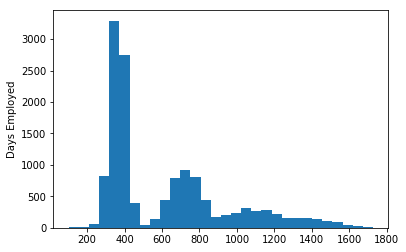

In [21]:
plt.hist(filtered_data['days_employed'], normed=False, bins=30)
plt.ylabel('Frequency')
plt.ylabel('Days Employed')

In [22]:
# Create dummy variables for categorical department variable
model_data = pd.concat([filtered_data, pd.get_dummies(filtered_data['dept'])], axis=1)

In [23]:
model_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,time_employed,days_employed,customer_service,data_science,design,engineer,marketing,sales
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015,585 days,585,1,0,0,0,0,0
1,825355.0,7,marketing,20,183000.0,4/29/2013,4/4/2014,340 days,340,0,0,0,0,1,0
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013,389 days,389,1,0,0,0,0,0
4,256971.0,2,data_science,23,276000.0,10/17/2011,8/22/2014,1040 days,1040,0,1,0,0,0,0
5,509529.0,4,data_science,14,165000.0,1/30/2012,8/30/2013,578 days,578,0,1,0,0,0,0


In [71]:
# Save to new csv
model_data.to_csv("employee_retention_data_notnull.csv")

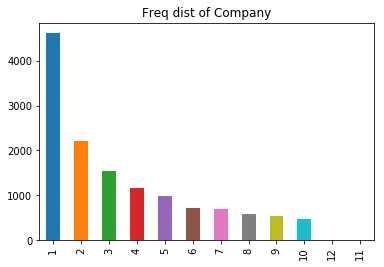

In [45]:
model_data['company_id'].value_counts().plot.bar(title="Freq dist of Company")

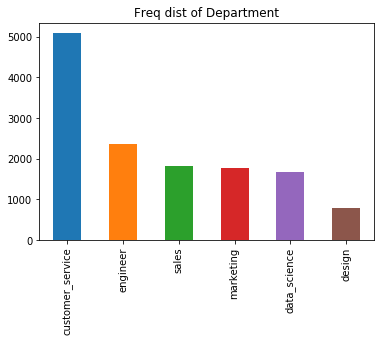

In [46]:
model_data['dept'].value_counts().plot.bar(title="Freq dist of Department")

C:\Users\Roz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


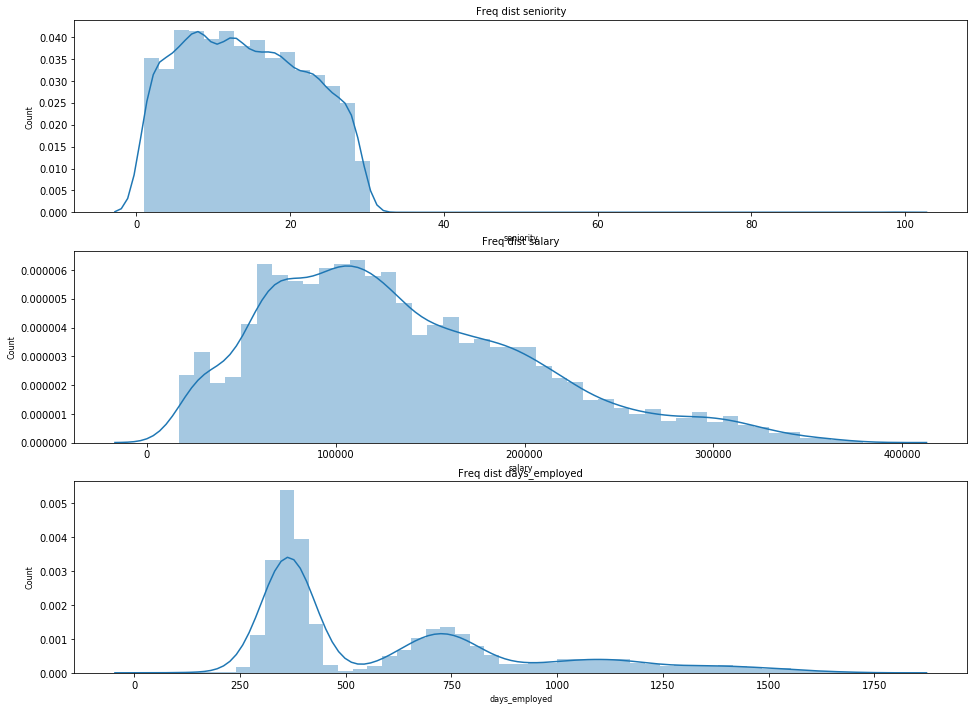

In [47]:
col_names = ['seniority','salary', 'days_employed']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(model_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

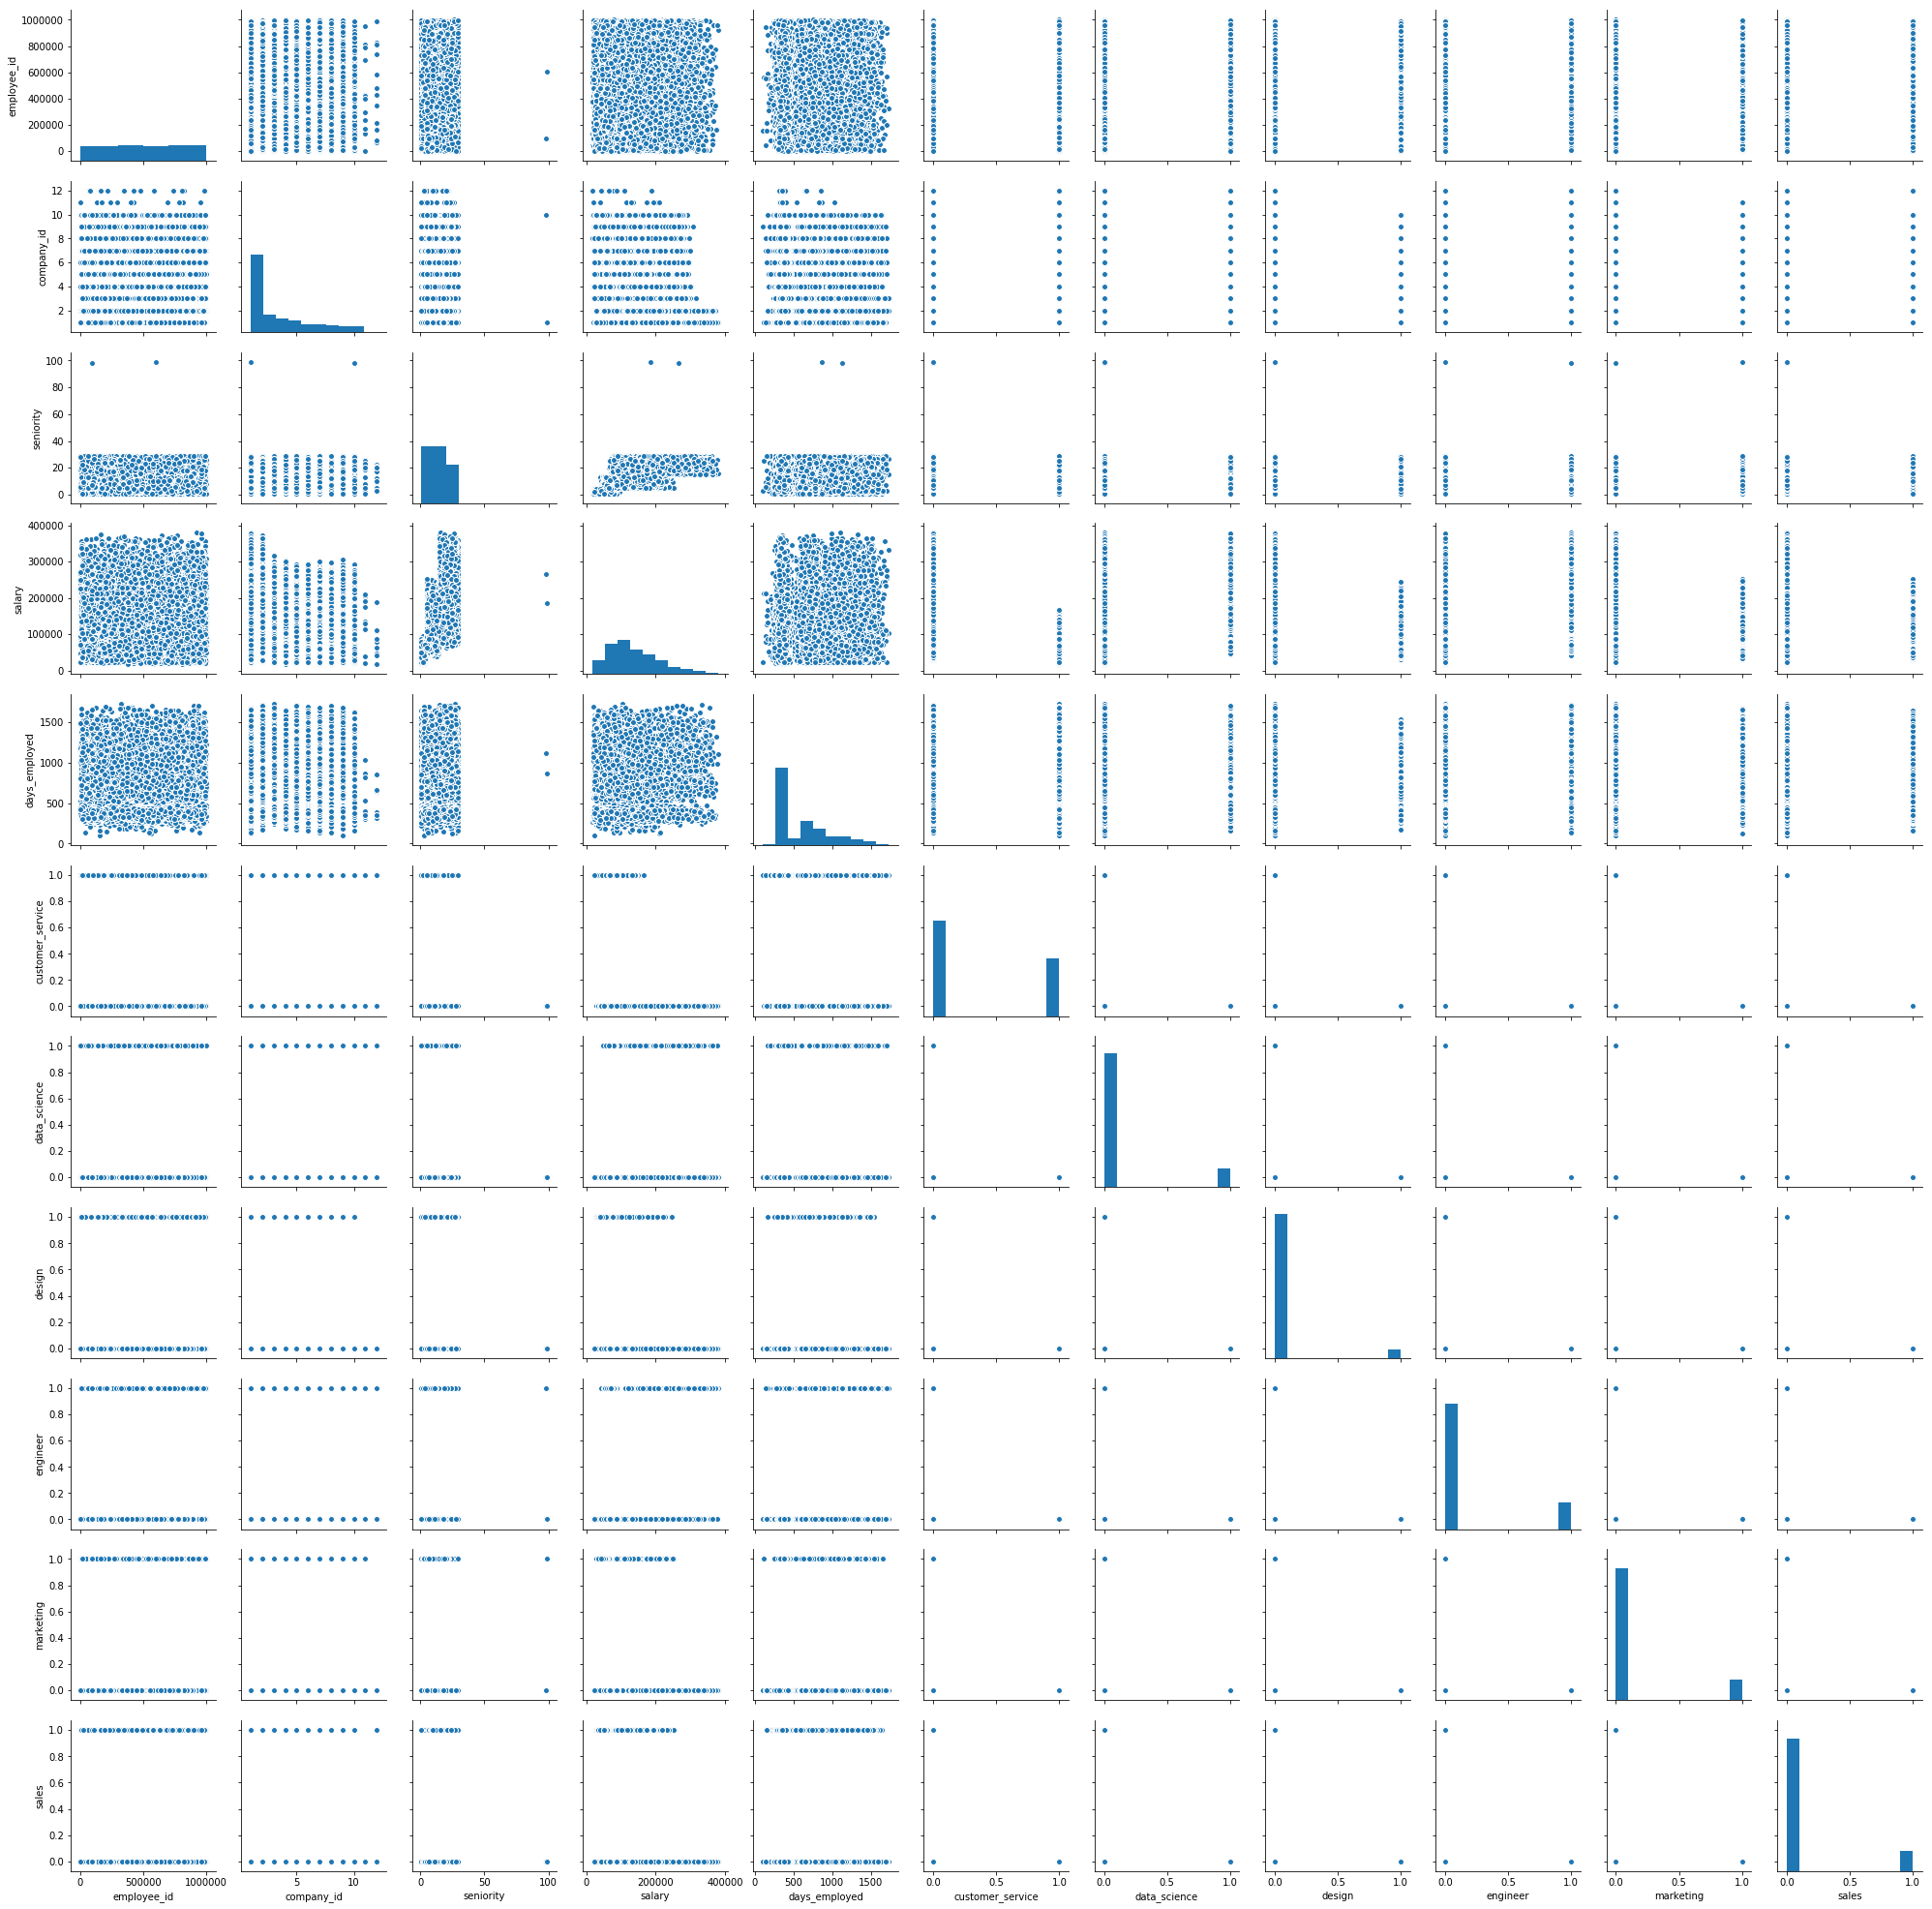

In [42]:
# Plot pairplots
sns.pairplot(model_data)

In [41]:
# Plot correlations
corr = model_data.corr()
corr.style.background_gradient()

,employee_id,company_id,seniority,salary,days_employed,customer_service,data_science,design,engineer,marketing,sales
employee_id,1,-0.00564797,0.00283707,-0.00192122,0.0101283,-0.0148905,-0.00903388,0.00633195,-0.00239093,0.0143749,0.0139911
company_id,-0.00564797,1,-0.000668939,-0.149518,-0.0141764,-0.00968123,0.00356647,-0.000996758,0.0221982,-0.0151183,0.00126886
seniority,0.00283707,-0.000668939,1,0.532776,0.00262324,0.0393322,-0.0298191,0.0134393,-0.0267563,0.00170979,-0.00811351
salary,-0.00192122,-0.149518,0.532776,1,0.0781686,-0.558987,0.335769,0.0146519,0.407517,0.00557053,-7.75658e-05
days_employed,0.0101283,-0.0141764,0.00262324,0.0781686,1,-0.0266209,0.0427744,-0.00802888,0.0502076,-0.0149918,-0.0391709
customer_service,-0.0148905,-0.00968123,0.0393322,-0.558987,-0.0266209,1,-0.293382,-0.192317,-0.358111,-0.30336,-0.306099
data_science,-0.00903388,0.00356647,-0.0298191,0.335769,0.0427744,-0.293382,1,-0.0932178,-0.17358,-0.147041,-0.148369
design,0.00633195,-0.000996758,0.0134393,0.0146519,-0.00802888,-0.192317,-0.0932178,1,-0.113784,-0.0963882,-0.0972582
engineer,-0.00239093,0.0221982,-0.0267563,0.407517,0.0502076,-0.358111,-0.17358,-0.113784,1,-0.179483,-0.181103
marketing,0.0143749,-0.0151183,0.00170979,0.00557053,-0.0149918,-0.30336,-0.147041,-0.0963882,-0.179483,1,-0.153415


In [24]:
# Define the predictors
X = model_data[['company_id', 'seniority', 'salary', 'customer_service', 'data_science', 'design', 'engineer', 'marketing', 'sales']]
X.head()

,company_id,seniority,salary,customer_service,data_science,design,engineer,marketing,sales
0,7,28,89000.0,1,0,0,0,0,0
1,7,20,183000.0,0,0,0,0,1,0
3,7,20,115000.0,1,0,0,0,0,0
4,2,23,276000.0,0,1,0,0,0,0
5,4,14,165000.0,0,1,0,0,0,0


In [25]:
# Define the target
y = model_data[['days_employed']]
y.head()

,days_employed
0,585
1,340
3,389
4,1040
5,578


In [26]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

In [27]:
# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [30]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [32]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 1.19848333e+00 -3.56550378e+00  7.26521753e-04  3.67748839e+01
  -2.21949294e+00 -3.00522436e+00 -2.99594133e+00 -3.95848940e+00
  -2.45957359e+01]]


In [33]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 155896.13


In [34]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: -0.20


In [36]:
len(X_test)

20

In [37]:
len(y_test)

20

In [48]:
model_data_customer_service = model_data[model_data['dept'] == 'customer_service']

In [49]:
model_data_customer_service.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,time_employed,days_employed,customer_service,data_science,design,engineer,marketing,sales
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015,585 days,585,1,0,0,0,0,0
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013,389 days,389,1,0,0,0,0,0
10,892155.0,6,customer_service,13,72000.0,11/12/2012,2/27/2015,837 days,837,1,0,0,0,0,0
21,219944.0,6,customer_service,15,98000.0,6/25/2012,5/31/2013,340 days,340,1,0,0,0,0,0
25,467023.0,3,customer_service,15,110000.0,5/31/2011,2/8/2013,619 days,619,1,0,0,0,0,0


In [50]:
model_data_customer_service.shape

(5094, 15)

In [52]:
model_data_customer_service.describe()

,employee_id,company_id,seniority,salary,time_employed,days_employed,customer_service,data_science,design,engineer,marketing,sales
count,5094.000000,5094.000000,5094.000000,5094.000000,5094,5094.000000,5094.0,5094.0,5094.0,5094.0,5094.0,5094.0
mean,496527.822929,3.425795,14.536317,84322.143698,602 days 05:49:23.957597,602.242638,1.0,0.0,0.0,0.0,0.0,0.0
std,288440.362647,2.726683,7.927994,31034.346175,322 days 17:10:01.801644,322.715299,0.0,0.0,0.0,0.0,0.0,0.0
min,273.000000,1.000000,1.000000,17000.000000,102 days 00:00:00,102.000000,1.0,0.0,0.0,0.0,0.0,0.0
25%,245818.000000,1.000000,8.000000,65000.000000,360 days 00:00:00,360.000000,1.0,0.0,0.0,0.0,0.0,0.0
50%,489487.000000,2.000000,15.000000,86000.000000,415 days 00:00:00,415.000000,1.0,0.0,0.0,0.0,0.0,0.0
75%,751660.000000,5.000000,21.000000,108000.000000,767 days 00:00:00,767.000000,1.0,0.0,0.0,0.0,0.0,0.0
max,999891.000000,12.000000,29.000000,166000.000000,1726 days 00:00:00,1726.000000,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Plot correlations
corr = model_data_customer_service.corr()
corr.style.background_gradient()

C:\Users\Roz\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,employee_id,company_id,seniority,salary,days_employed,customer_service,data_science,design,engineer,marketing,sales
employee_id,1,-0.0155457,-0.00528319,-0.00968213,0.014848,nan,nan,nan,nan,nan,nan
company_id,-0.0155457,1,-0.0153618,-0.247049,0.0127681,nan,nan,nan,nan,nan,nan
seniority,-0.00528319,-0.0153618,1,0.800523,-0.0985196,nan,nan,nan,nan,nan,nan
salary,-0.00968213,-0.247049,0.800523,1,-0.0990208,nan,nan,nan,nan,nan,nan
days_employed,0.014848,0.0127681,-0.0985196,-0.0990208,1,nan,nan,nan,nan,nan,nan
customer_service,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
data_science,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
design,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
engineer,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
marketing,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [54]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015
1,825355.0,7,marketing,20,183000.0,4/29/2013,4/4/2014
2,927315.0,4,marketing,14,101000.0,10/13/2014,NaN
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013
4,256971.0,2,data_science,23,276000.0,10/17/2011,8/22/2014


In [64]:
# Create a quit/not variable
data['employed'] = np.where(data['quit_date'].isnull(), 0, 1)

In [65]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employed
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015,1
1,825355.0,7,marketing,20,183000.0,4/29/2013,4/4/2014,1
2,927315.0,4,marketing,14,101000.0,10/13/2014,NaN,0
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013,1
4,256971.0,2,data_science,23,276000.0,10/17/2011,8/22/2014,1


In [66]:
data.tail()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employed
24697,549847.0,3,customer_service,16,97000.0,2/18/2015,NaN,0
24698,590087.0,4,engineer,10,160000.0,10/26/2015,NaN,0
24699,777612.0,4,customer_service,11,67000.0,9/3/2013,10/23/2015,1
24700,97289.0,10,engineer,98,266000.0,12/13/2011,1/9/2015,1
24701,604052.0,1,marketing,99,185000.0,7/26/2011,12/6/2013,1


In [67]:
# Plot correlations
corr = data.corr()
corr.style.background_gradient()

,employee_id,company_id,seniority,salary,employed
employee_id,1,-0.00622458,-0.00197635,0.00294783,0.00165451
company_id,-0.00622458,1,-0.0100256,-0.163892,0.0132422
seniority,-0.00197635,-0.0100256,1,0.559465,0.000496385
salary,0.00294783,-0.163892,0.559465,1,-0.036561
employed,0.00165451,0.0132422,0.000496385,-0.036561,1


C:\Users\Roz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


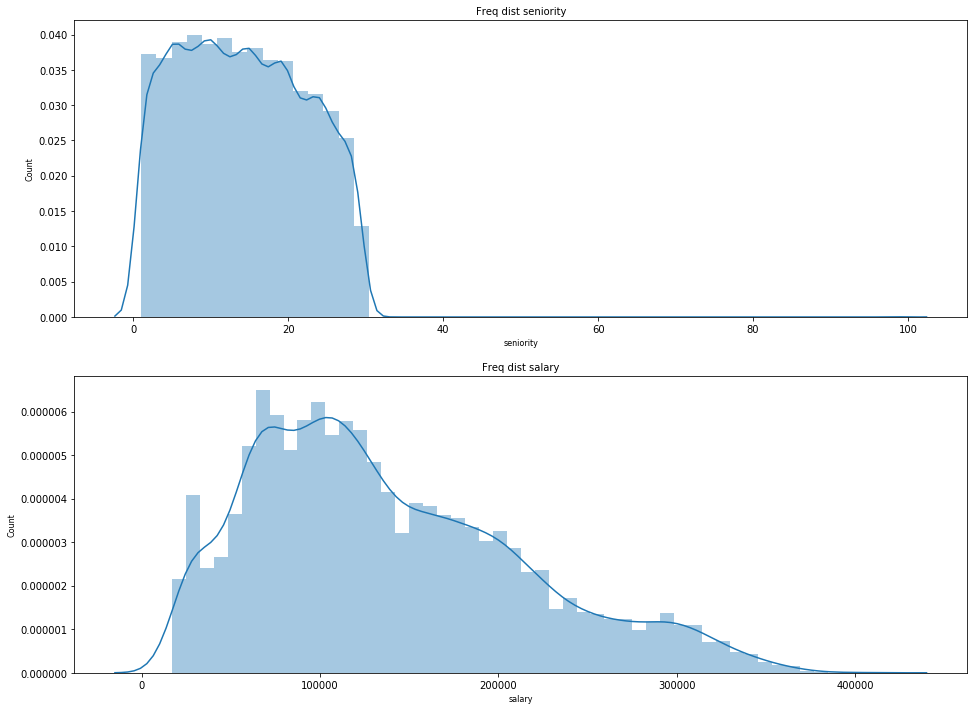

In [68]:
col_names = ['seniority','salary']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [70]:
model_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,time_employed,days_employed,customer_service,data_science,design,engineer,marketing,sales
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015,585 days,585,1,0,0,0,0,0
1,825355.0,7,marketing,20,183000.0,4/29/2013,4/4/2014,340 days,340,0,0,0,0,1,0
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013,389 days,389,1,0,0,0,0,0
4,256971.0,2,data_science,23,276000.0,10/17/2011,8/22/2014,1040 days,1040,0,1,0,0,0,0
5,509529.0,4,data_science,14,165000.0,1/30/2012,8/30/2013,578 days,578,0,1,0,0,0,0


### Fit random forest regression model

In [87]:
features = model_data
features.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,time_employed,days_employed,customer_service,data_science,design,engineer,marketing,sales
0,13021.0,7,customer_service,28,89000.0,3/24/2014,10/30/2015,585 days,585,1,0,0,0,0,0
1,825355.0,7,marketing,20,183000.0,4/29/2013,4/4/2014,340 days,340,0,0,0,0,1,0
3,662910.0,7,customer_service,20,115000.0,5/14/2012,6/7/2013,389 days,389,1,0,0,0,0,0
4,256971.0,2,data_science,23,276000.0,10/17/2011,8/22/2014,1040 days,1040,0,1,0,0,0,0
5,509529.0,4,data_science,14,165000.0,1/30/2012,8/30/2013,578 days,578,0,1,0,0,0,0


In [88]:
# Labels are the values we want to predict
labels = np.array(features['days_employed'])

In [89]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('days_employed', axis = 1)

In [91]:
# Remove extraneous variables
features= features.drop(['employee_id','dept','join_date','quit_date','time_employed'], axis = 1)

In [92]:
# Saving feature names for later use
feature_list = list(features.columns)

In [93]:
# Convert to numpy array
features = np.array(features)

In [94]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [95]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [96]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (10132, 9)
Training Labels Shape: (10132,)
Testing Features Shape: (3378, 9)
Testing Labels Shape: (3378,)


In [97]:
# What is a good baseline?

In [98]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [99]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [100]:
# Train the model on training data
rf.fit(train_features, train_labels);

In [101]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [102]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [103]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'days.')

Mean Absolute Error: 292.81 days.


In [104]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [105]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 44.98 %.


In [106]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [107]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [108]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [109]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: salary               Importance: 0.45
Variable: seniority            Importance: 0.29
Variable: company_id           Importance: 0.18
Variable: data_science         Importance: 0.02
Variable: engineer             Importance: 0.02
Variable: marketing            Importance: 0.02
Variable: sales                Importance: 0.02
Variable: design               Importance: 0.01
Variable: customer_service     Importance: 0.0


In [110]:
# New random forest with only the three most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [111]:
# Extract the three most important features
important_indices = [feature_list.index('salary'), feature_list.index('seniority'), feature_list.index('company_id')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

In [112]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [113]:
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

In [114]:
errors = abs(predictions - test_labels)

In [115]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'days.')

Mean Absolute Error: 292.9 days.


In [116]:
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

In [117]:
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 45.15 %.


### Visualize results

In [118]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# Set the style
plt.style.use('fivethirtyeight')

In [120]:
# list of x locations for plotting
x_values = list(range(len(importances)))

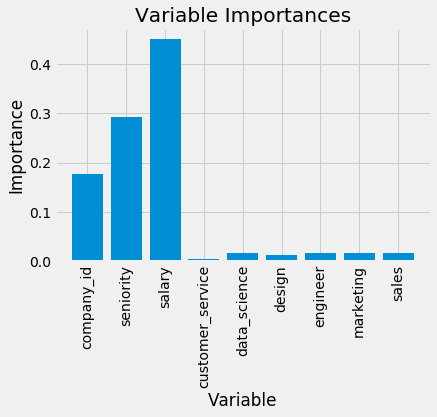

In [122]:
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Results

Salary, seniority and company are the most important factors driving employee churn, which makes sense since many people change jobs to increase their salary, more senior employees are likely to stay in their positions longer, and company culture can have a big impact on employee churn rates. One key follow-up would be to look at the company cultures at the various companies and see whether there are commonalities between companies with higher or lower churn rates. Since salary is the most important driver, it is important that the company make sure that their compensation ladder is industry-appropriate, and that employees have the opportunity for raises and promotions. Seniority is more difficult to address, but hiring experienced people whenever appropriate may help decrease churn. Given that salary is the primary driver of employee churn, I would like to see a variable indicating the percentage that the employee's salary has increased during their time at the company.